In [1]:
# Importing pandas to load dataset
import pandas as pd

c:\Users\Chirag Tiwari\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Loading Data

In [2]:
df = pd.read_csv('ecommerce_purchase_data.csv')  

In [3]:
df.shape  # initial shape before pre-processing

(3000, 10)

In [4]:
# Current columns in the dataset
df.columns

Index(['CustomerID', 'Age', 'Gender', 'AnnualIncome', 'PurchaseAmount',
       'PurchaseFrequency', 'LastPurchaseDate', 'ProductCategory',
       'LoyaltyProgramMember', 'CustomerRating'],
      dtype='object')

In [5]:
df.head()

CustomerID   Age  Gender  AnnualIncome  PurchaseAmount  PurchaseFrequency  \
0         1.0  56.0    Male       70225.0      125.635565               48.0   
1         2.0  69.0    Male       57952.0      156.417933                NaN   
2         3.0  46.0   Other       57663.0      244.151650               39.0   
3         4.0  32.0  Female       81381.0       36.275633               29.0   
4         5.0  60.0    Male       67929.0      307.515054               24.0   

  LastPurchaseDate ProductCategory  LoyaltyProgramMember  CustomerRating  
0       01-01-2023            Toys                   0.0        1.210366  
1       02-01-2023           Books                   0.0        3.201970  
2       03-01-2023            Toys                   0.0        2.229175  
3       04-01-2023           Books                   1.0        3.134410  
4              NaN        Clothing                   1.0        1.537188

In [6]:
# Finding if column is categorical
df['ProductCategory'].value_counts()

ProductCategory
Toys           608
Clothing       608
Books          590
Electronics    578
Home           565
Name: count, dtype: int64

In [7]:
# Checking for missing values
df.isnull().sum()

CustomerID              53
Age                     38
Gender                  36
AnnualIncome            45
PurchaseAmount          44
PurchaseFrequency       55
LastPurchaseDate        35
ProductCategory         51
LoyaltyProgramMember    46
CustomerRating          43
dtype: int64

In [8]:
df.dtypes  # data types of columns

CustomerID              float64
Age                     float64
Gender                   object
AnnualIncome            float64
PurchaseAmount          float64
PurchaseFrequency       float64
LastPurchaseDate         object
ProductCategory          object
LoyaltyProgramMember    float64
CustomerRating          float64
dtype: object

### Understanding Data

In [9]:
df.describe()

CustomerID          Age   AnnualIncome  PurchaseAmount  \
count  2947.000000  2962.000000    2955.000000     2956.000000   
mean   1500.295894    43.517556   69938.474788      254.474133   
std     866.181462    14.937307   29174.762995      143.610427   
min       1.000000    18.000000   20060.000000        5.310621   
25%     748.500000    31.000000   44760.000000      134.347252   
50%    1500.000000    43.500000   69589.000000      255.926920   
75%    2249.500000    56.000000   95905.000000      377.407216   
max    3000.000000    69.000000  119993.000000      499.925376   

       PurchaseFrequency  LoyaltyProgramMember  CustomerRating  
count        2945.000000           2954.000000     2957.000000  
mean           25.302547              0.506093        3.025023  
std            14.127879              0.500048        1.146625  
min             1.000000              0.000000        1.001010  
25%            13.000000              0.000000        2.037566  
50%            25.000000              1.000000        3.060551  
75%            38.000000              1.000000        4.000336  
max            49.000000              1.000000        4.999699

In [10]:
df['LoyaltyProgramMember'].value_counts()  # Categorical column

LoyaltyProgramMember
1.0    1495
0.0    1459
Name: count, dtype: int64

### Segregating Columns

In [11]:
numerical_columns = ['Age', 'AnnualIncome', 'PurchaseAmount', 'PurchaseFrequency', 'CustomerRating']
categorical_columns = ['Gender', 'ProductCategory', 'LoyaltyProgramMember']
date_columns = ['LastPurchaseDate']
other_columns = ['CustomerID']

## Handling Missing Values

In [12]:
# Dropping rows where 'CustomerID' is missing
df = df.dropna(subset=other_columns)  

In [13]:
df.isnull().sum()

CustomerID               0
Age                     37
Gender                  36
AnnualIncome            43
PurchaseAmount          44
PurchaseFrequency       55
LastPurchaseDate        35
ProductCategory         49
LoyaltyProgramMember    46
CustomerRating          41
dtype: int64

In [14]:
df.shape  # new shape

(2947, 10)

In [15]:
# Filling missing values of numerical columns with median of the column
for column in numerical_columns:
    df[column] = df[column].fillna(df[column].median())

In [16]:
df.isnull().sum()

CustomerID               0
Age                      0
Gender                  36
AnnualIncome             0
PurchaseAmount           0
PurchaseFrequency        0
LastPurchaseDate        35
ProductCategory         49
LoyaltyProgramMember    46
CustomerRating           0
dtype: int64

In [17]:
# Filling missing values of categorical columns as 'null' and making it a category
for column in categorical_columns:
    df[column] = df[column].fillna('null')
    df[column].astype('category')

In [18]:
df.isnull().sum()

CustomerID               0
Age                      0
Gender                   0
AnnualIncome             0
PurchaseAmount           0
PurchaseFrequency        0
LastPurchaseDate        35
ProductCategory          0
LoyaltyProgramMember     0
CustomerRating           0
dtype: int64

### Making use of Date column

In [19]:
from datetime import datetime

In [20]:

# Formatting date column before using it
df['LastPurchaseDate'] = pd.to_datetime(df['LastPurchaseDate'], format='%d-%m-%Y')

# Subtracting date with today's date and making a new numerical column
df['DaysBeforePurchase'] = (datetime.now() - df['LastPurchaseDate']).dt.days

In [21]:
numerical_columns.append('DaysBeforePurchase')  # Updating numerical columns list

In [22]:
df.head()

CustomerID   Age  Gender  AnnualIncome  PurchaseAmount  PurchaseFrequency  \
0         1.0  56.0    Male       70225.0      125.635565               48.0   
1         2.0  69.0    Male       57952.0      156.417933               25.0   
2         3.0  46.0   Other       57663.0      244.151650               39.0   
3         4.0  32.0  Female       81381.0       36.275633               29.0   
4         5.0  60.0    Male       67929.0      307.515054               24.0   

  LastPurchaseDate ProductCategory LoyaltyProgramMember  CustomerRating  \
0       2023-01-01            Toys                  0.0        1.210366   
1       2023-01-02           Books                  0.0        3.201970   
2       2023-01-03            Toys                  0.0        2.229175   
3       2023-01-04           Books                  1.0        3.134410   
4              NaT        Clothing                  1.0        1.537188   

   DaysBeforePurchase  
0               614.0  
1               613.0  
2               612.0  
3               611.0  
4                 NaN

In [23]:
# Dropping rows where 'DaysBeforePurchase' is missing
df = df.dropna(subset='DaysBeforePurchase')

In [24]:
# Dropping the date column since we can't use it anymore
df = df.drop('LastPurchaseDate', axis=1)

In [25]:
df.head()

CustomerID   Age  Gender  AnnualIncome  PurchaseAmount  PurchaseFrequency  \
0         1.0  56.0    Male       70225.0      125.635565               48.0   
1         2.0  69.0    Male       57952.0      156.417933               25.0   
2         3.0  46.0   Other       57663.0      244.151650               39.0   
3         4.0  32.0  Female       81381.0       36.275633               29.0   
5         6.0  25.0    Male       29343.0      491.948842               22.0   

  ProductCategory LoyaltyProgramMember  CustomerRating  DaysBeforePurchase  
0            Toys                  0.0        1.210366               614.0  
1           Books                  0.0        3.201970               613.0  
2            Toys                  0.0        2.229175               612.0  
3           Books                  1.0        3.134410               611.0  
5        Clothing                  1.0        4.730520               609.0

In [26]:
df.isnull().sum()  # Missing values handled

CustomerID              0
Age                     0
Gender                  0
AnnualIncome            0
PurchaseAmount          0
PurchaseFrequency       0
ProductCategory         0
LoyaltyProgramMember    0
CustomerRating          0
DaysBeforePurchase      0
dtype: int64

In [27]:
df.shape  # New shape

(2912, 10)

### Performing Encoding on categorical features

In [28]:
from feature_engine.encoding import OneHotEncoder

In [29]:
# Performing One Hot Encoding
ohe_enc = OneHotEncoder(variables=categorical_columns, drop_last=False)

In [30]:
ohe_enc

OneHotEncoder(variables=['Gender', 'ProductCategory', 'LoyaltyProgramMember'])

In [31]:
# Current columns
print(df.columns)

Index(['CustomerID', 'Age', 'Gender', 'AnnualIncome', 'PurchaseAmount',
       'PurchaseFrequency', 'ProductCategory', 'LoyaltyProgramMember',
       'CustomerRating', 'DaysBeforePurchase'],
      dtype='object')


In [32]:
ohe_enc.fit(df[categorical_columns])

OneHotEncoder(variables=['Gender', 'ProductCategory', 'LoyaltyProgramMember'])

In [33]:
# New columns which are one hot encoded
cat_columns = ohe_enc.transform(df[categorical_columns])

In [34]:
# Merging our features and the one hot encoded features
df = pd.concat((df, cat_columns), axis=1)

In [35]:
df.head()

CustomerID   Age  Gender  AnnualIncome  PurchaseAmount  PurchaseFrequency  \
0         1.0  56.0    Male       70225.0      125.635565               48.0   
1         2.0  69.0    Male       57952.0      156.417933               25.0   
2         3.0  46.0   Other       57663.0      244.151650               39.0   
3         4.0  32.0  Female       81381.0       36.275633               29.0   
5         6.0  25.0    Male       29343.0      491.948842               22.0   

  ProductCategory LoyaltyProgramMember  CustomerRating  DaysBeforePurchase  \
0            Toys                  0.0        1.210366               614.0   
1           Books                  0.0        3.201970               613.0   
2            Toys                  0.0        2.229175               612.0   
3           Books                  1.0        3.134410               611.0   
5        Clothing                  1.0        4.730520               609.0   

   ...  Gender_null  ProductCategory_Toys  ProductCategory_Books  \
0  ...            0                     1                      0   
1  ...            0                     0                      1   
2  ...            0                     1                      0   
3  ...            0                     0                      1   
5  ...            0                     0                      0   

   ProductCategory_Clothing  ProductCategory_Home  \
0                         0                     0   
1                         0                     0   
2                         0                     0   
3                         0                     0   
5                         1                     0   

   ProductCategory_Electronics  ProductCategory_null  \
0                            0                     0   
1                            0                     0   
2                            0                     0   
3                            0                     0   
5                            0                     0   

   LoyaltyProgramMember_0.0  LoyaltyProgramMember_1.0  \
0                         1                         0   
1                         1                         0   
2                         1                         0   
3                         0                         1   
5                         0                         1   

   LoyaltyProgramMember_null  
0                          0  
1                          0  
2                          0  
3                          0  
5                          0  

[5 rows x 23 columns]

In [36]:
# Dropping non-encoded columns
df.drop(columns=categorical_columns, inplace=True)

In [37]:
# New columns
df.columns

Index(['CustomerID', 'Age', 'AnnualIncome', 'PurchaseAmount',
       'PurchaseFrequency', 'CustomerRating', 'DaysBeforePurchase',
       'Gender_Male', 'Gender_Other', 'Gender_Female', 'Gender_null',
       'ProductCategory_Toys', 'ProductCategory_Books',
       'ProductCategory_Clothing', 'ProductCategory_Home',
       'ProductCategory_Electronics', 'ProductCategory_null',
       'LoyaltyProgramMember_0.0', 'LoyaltyProgramMember_1.0',
       'LoyaltyProgramMember_null'],
      dtype='object')

## Implementing Model along with Scaling

In [38]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [39]:

# Required Features
features = ['Age', 'AnnualIncome', 'PurchaseAmount', 'PurchaseFrequency', 'DaysBeforePurchase', 'CustomerRating']

# Temporary dataframe for model making
X = df[features]

In [40]:
# Scaling the features in the temporary dataframe
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [41]:
# Model implementation
isolation_forest = IsolationForest(contamination=0.05, random_state=42)

# Making a new column 'anomaly' 
df['anomaly'] = isolation_forest.fit_predict(X_scaled)

In [42]:
# Making 'anomaly' a categorical feature with values 1 and 0
df['anomaly'] = df['anomaly'].apply(lambda x: 1 if x == -1 else 0)

In [43]:
df

CustomerID   Age  AnnualIncome  PurchaseAmount  PurchaseFrequency  \
0            1.0  56.0       70225.0      125.635565               48.0   
1            2.0  69.0       57952.0      156.417933               25.0   
2            3.0  46.0       57663.0      244.151650               39.0   
3            4.0  32.0       81381.0       36.275633               29.0   
5            6.0  25.0       29343.0      491.948842               22.0   
...          ...   ...           ...             ...                ...   
2995      2996.0  38.0      110283.0      312.042883                5.0   
2996      2997.0  52.0       92255.0      150.675418               37.0   
2997      2998.0  49.0      101899.0       47.790648               31.0   
2998      2999.0  47.0       48718.0      380.917209               12.0   
2999      3000.0  56.0      114337.0      160.451782               35.0   

      CustomerRating  DaysBeforePurchase  Gender_Male  Gender_Other  \
0           1.210366               614.0            1             0   
1           3.201970               613.0            1             0   
2           2.229175               612.0            0             1   
3           3.134410               611.0            0             0   
5           4.730520               609.0            1             0   
...              ...                 ...          ...           ...   
2995        3.942962             -2381.0            0             1   
2996        1.062000             -2382.0            0             0   
2997        4.519943             -2383.0            1             0   
2998        1.403219             -2384.0            1             0   
2999        1.562095             -2385.0            1             0   

      Gender_Female  ...  ProductCategory_Toys  ProductCategory_Books  \
0                 0  ...                     1                      0   
1                 0  ...                     0                      1   
2                 0  ...                     1                      0   
3                 1  ...                     0                      1   
5                 0  ...                     0                      0   
...             ...  ...                   ...                    ...   
2995              0  ...                     0                      0   
2996              1  ...                     1                      0   
2997              0  ...                     0                      1   
2998              0  ...                     0                      0   
2999              0  ...                     0                      0   

      ProductCategory_Clothing  ProductCategory_Home  \
0                            0                     0   
1                            0                     0   
2                            0                     0   
3                            0                     0   
5                            1                     0   
...                        ...                   ...   
2995                         0                     1   
2996                         0                     0   
2997                         0                     0   
2998                         1                     0   
2999                         0                     1   

      ProductCategory_Electronics  ProductCategory_null  \
0                               0                     0   
1                               0                     0   
2                               0                     0   
3                               0                     0   
5                               0                     0   
...                           ...                   ...   
2995                            0                     0   
2996                            0                     0   
2997                            0                     0   
2998                            0                     0   
2999                            0                    

## Visualization

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\Chirag Tiwari\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Chirag Tiwari\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Chirag Tiwari\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Chirag Tiwari\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

Text(0.5, 1.02, 'Pair Plot of Features')

<Figure size 2000x2000 with 0 Axes>

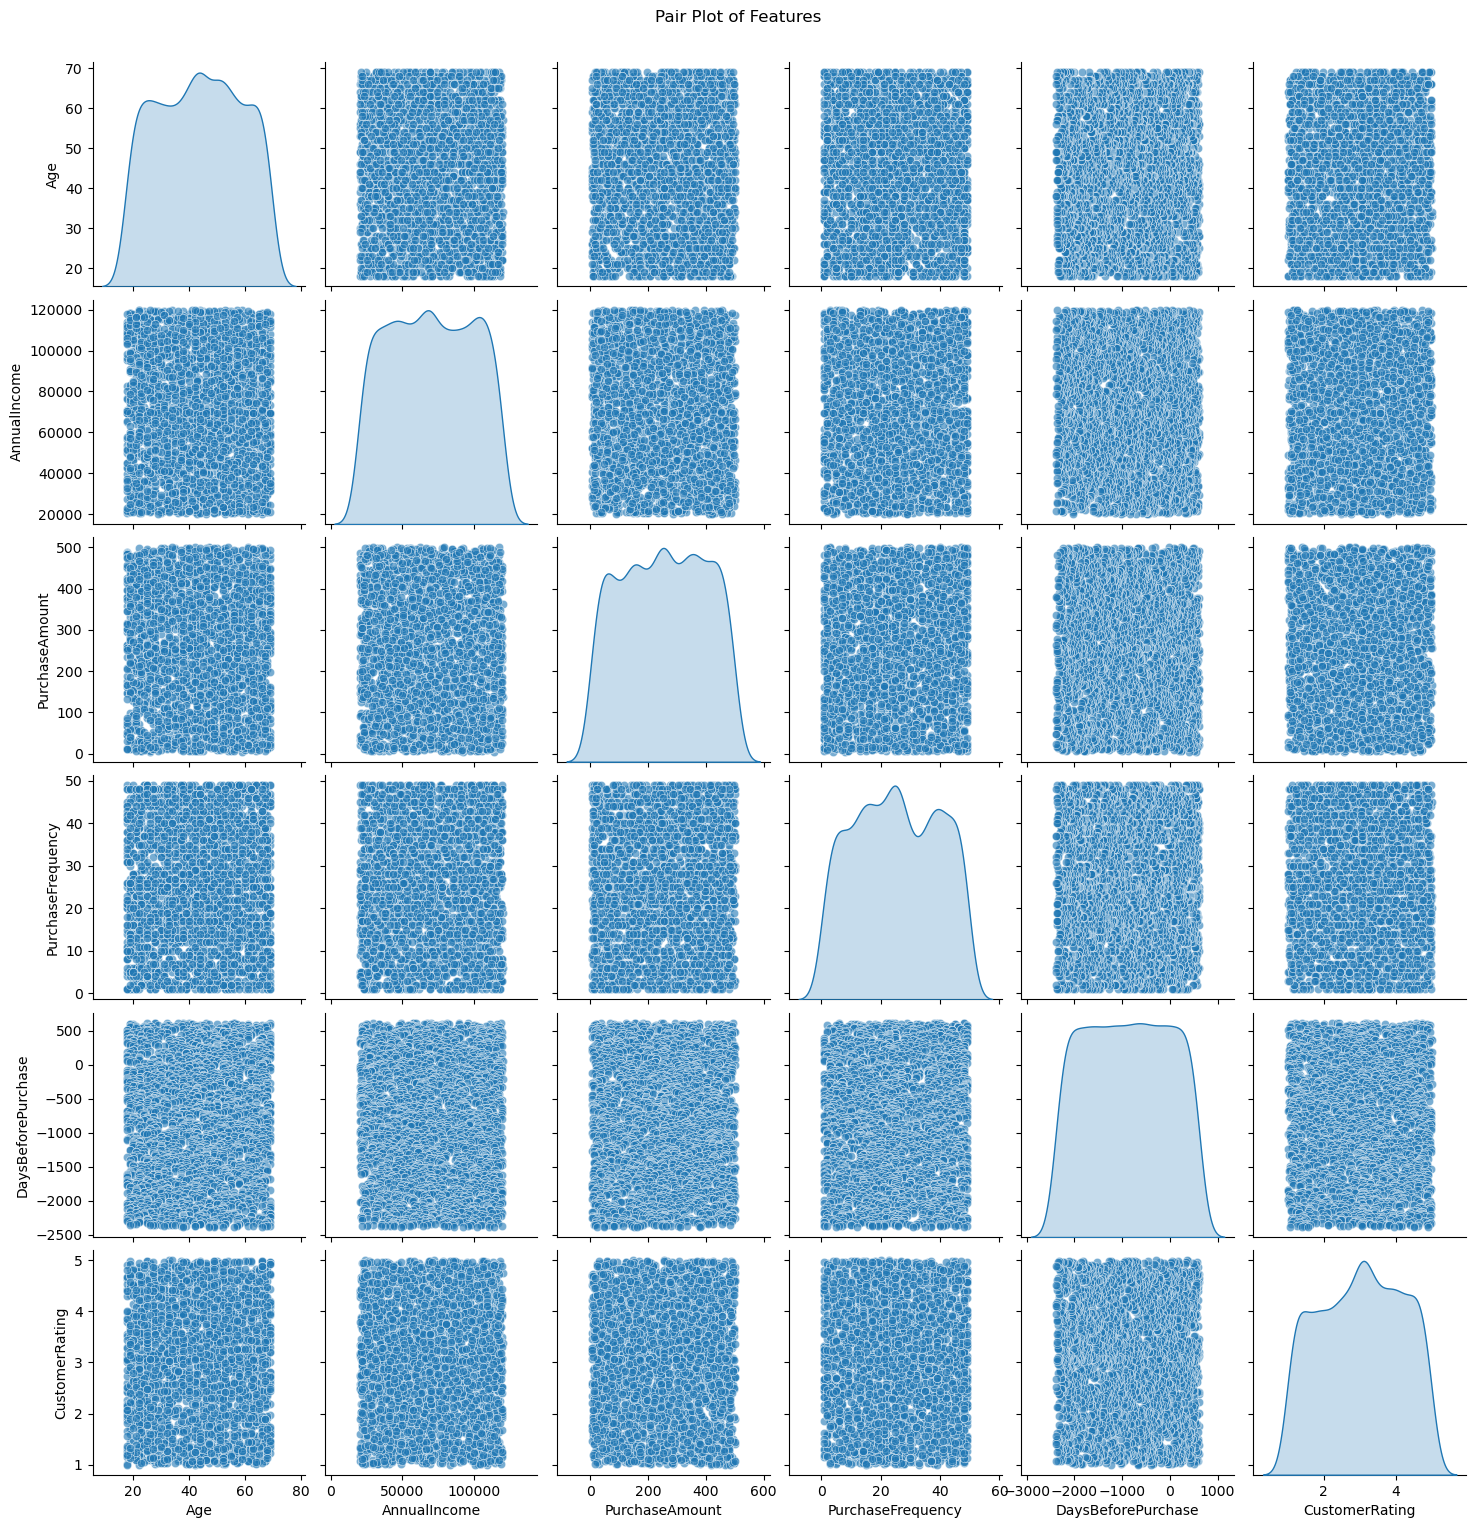

In [46]:
# pairplot for all features
plt.figure(figsize=(20, 20))
sns.pairplot(X[features], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Features', y=1.02)

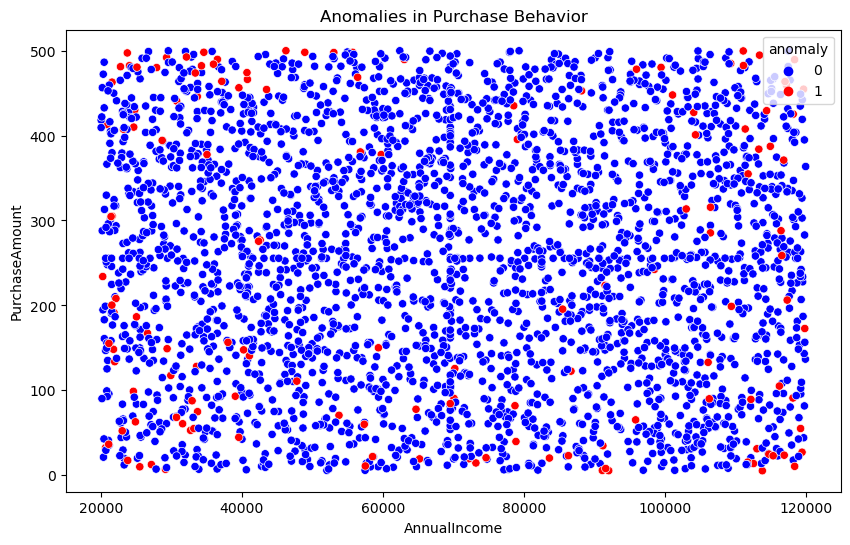

In [58]:
# Visualizing Anomalies/Outliers in AnnualIncome Vs PurchaseAmount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='PurchaseAmount', hue='anomaly', data=df, palette={0: 'blue', 1: 'red'})
plt.title('Anomalies in Purchase Behavior')
plt.savefig('AnnualIncome Vs PurchaseAmount')
plt.show()

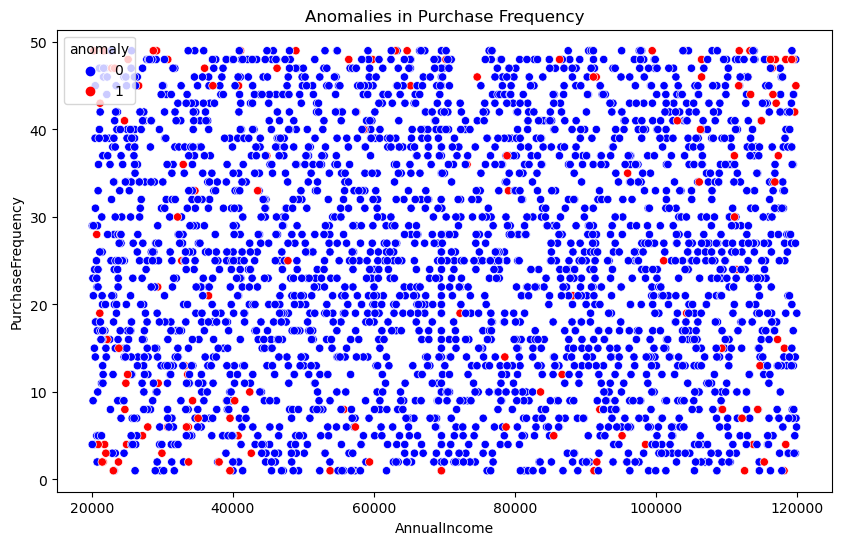

In [59]:
# Visualizing anomalies/outliers in AnnualIncome Vs PurchaseFrequency
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='PurchaseFrequency', hue='anomaly', data=df, palette={0: 'blue', 1: 'red'})
plt.title('Anomalies in Purchase Frequency')
plt.savefig('AnnualIncome Vs PurchaseFrequency')
plt.show()

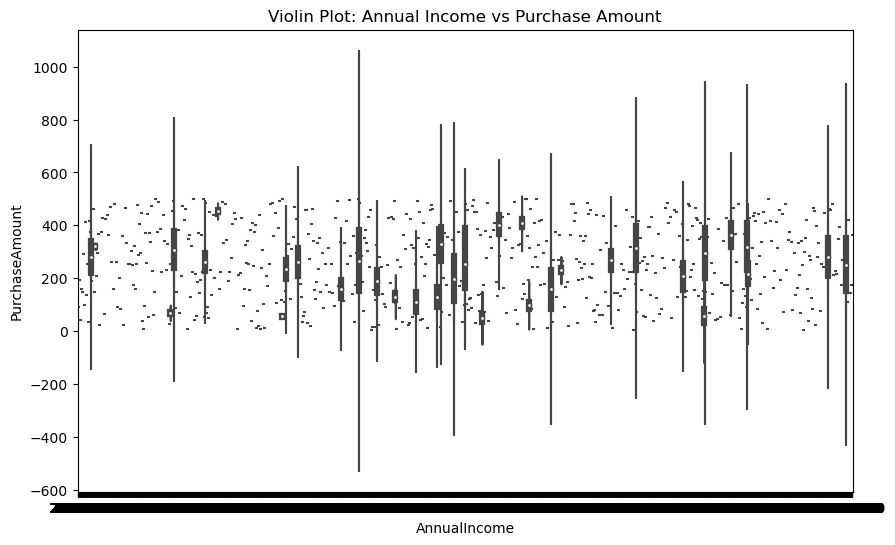

In [49]:
plt.figure(figsize=(10,6))
sns.violinplot(x=df['AnnualIncome'], y=df['PurchaseAmount'])
plt.title('Violin Plot: Annual Income vs Purchase Amount')
plt.show()


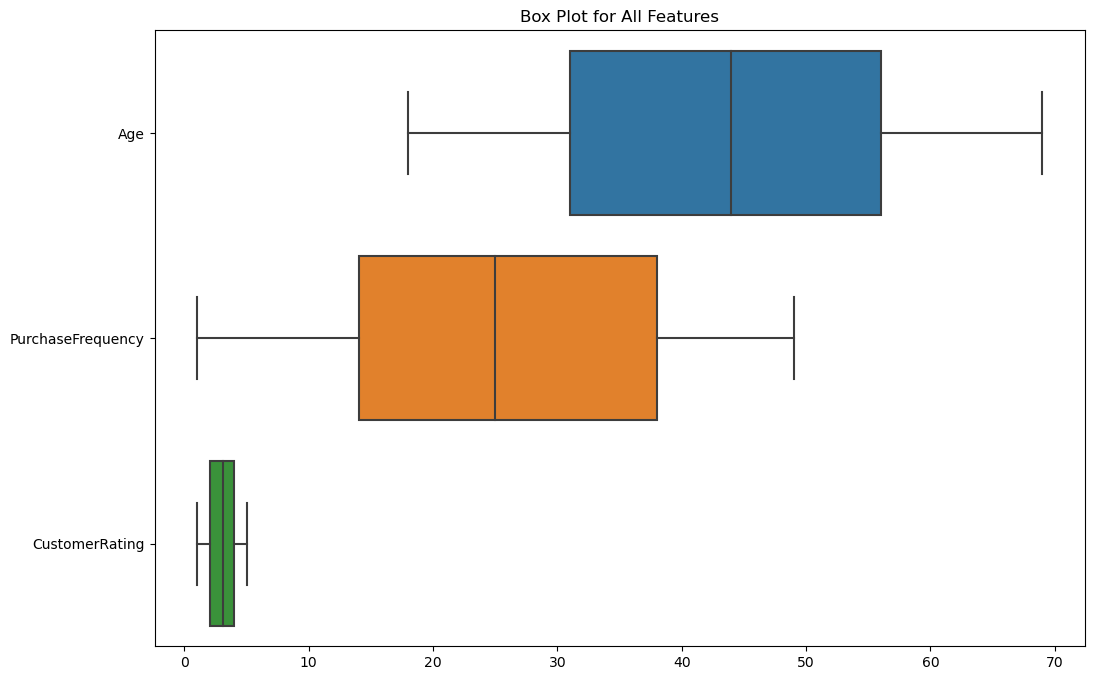

In [50]:
# Box plot for other features for finding outliers
plt.figure(figsize=(12,8))
features = ['Age', 'PurchaseFrequency', 'CustomerRating']
sns.boxplot(data=df[features], orient='h')
plt.title('Box Plot for All Features')
plt.show()

## Report And Insights

In [51]:
# Making different datasets for outliers and inliners
outliers = df[df['anomaly'] == 1]
inliers = df[df['anomaly'] == 0]

In [52]:
# Total outliers found from the model implemented above
print("Number of outliers detected:", len(outliers))

Number of outliers detected: 146


In [53]:
# Description of outliers in the data
print("\nOutlier Statistics:")
print(outliers[features].describe())


Outlier Statistics:
              Age  PurchaseFrequency  CustomerRating
count  146.000000         146.000000      146.000000
mean    43.712329          25.808219        2.946096
std     20.665133          18.646000        1.513389
min     18.000000           1.000000        1.001321
25%     21.250000           6.250000        1.378636
50%     45.000000          25.000000        2.854034
75%     66.000000          46.000000        4.546690
max     69.000000          49.000000        4.997836


In [54]:
# Description for data which isn't outlier
print("\nInlier Statistics:")
print(inliers[features].describe())


Inlier Statistics:
               Age  PurchaseFrequency  CustomerRating
count  2766.000000        2766.000000     2766.000000
mean     43.571584          25.246927        3.032744
std      14.462139          13.706565        1.114192
min      18.000000           1.000000        1.001010
25%      31.000000          14.000000        2.103317
50%      44.000000          25.000000        3.063938
75%      56.000000          37.000000        3.959615
max      69.000000          49.000000        4.999699


In [55]:
print("\nPotential Business Impact:")
print(f"1. Average purchase amount of outliers: {outliers['PurchaseAmount'].mean()}")
print(f"2. Average purchase amount of inliers: {inliers['PurchaseAmount'].mean()}")
print(f"3. Total purchase amount of outliers: {outliers['PurchaseAmount'].sum()}")
print(f"4. Percentage of total purchase amount from outliers: {(outliers['PurchaseAmount'].sum() / df['PurchaseAmount'].sum()) * 100}")


Potential Business Impact:
1. Average purchase amount of outliers: 249.0372263716164
2. Average purchase amount of inliers: 254.07663317514098
3. Total purchase amount of outliers: 36359.435050256
4. Percentage of total purchase amount from outliers: 4.919184621866444
